In [1]:
# Use seaborn for pairplot
#!pip install seaborn

In [2]:
from __future__ import absolute_import, division, print_function
 
import pathlib
 
import pandas as pd
import seaborn as sns
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 
print(tf.__version__)

2.9.2


# Get the data
Download the dataset.

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

30286/30286 [==============================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [4]:
##dataset_path = "https://archive.ics.uci.edu/ml/datasets/Auto+MPG/Auto+MPG.data"

In [5]:
##data = pd.read_csv(dataset_path, sep='delimiter', header=None)

Import it using pandas

In [6]:
 
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", 
                "Acceleration", "Model Year", "Origin"]
 
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values= "?", comment= '\t', sep=" ", skipinitialspace=True)
 
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Clean Data
The dataset contains a few unknowns values

In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset['Horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: Horsepower, Length: 93, dtype: int64

To keep it this initial tutorial simple, drop those rows

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


The "Origin" column is really categorical, not numeric. So convert that to a one-hot

In [11]:
origin = dataset.pop("Origin")

In [12]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

<ipython-input-12-abd677f12a41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['USA'] = (origin == 1)*1.0
<ipython-input-12-abd677f12a41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Europe'] = (origin == 2)*1.0
<ipython-input-12-abd677f12a41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


# **Split the data into train and test**
Now the dataset is splitted into a training test and test set.
The test set would be used in the final evaluation of the model

In [13]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# ***Inspect the data***
Have a quick look at the joint distribution of few pairs of columns from the training set

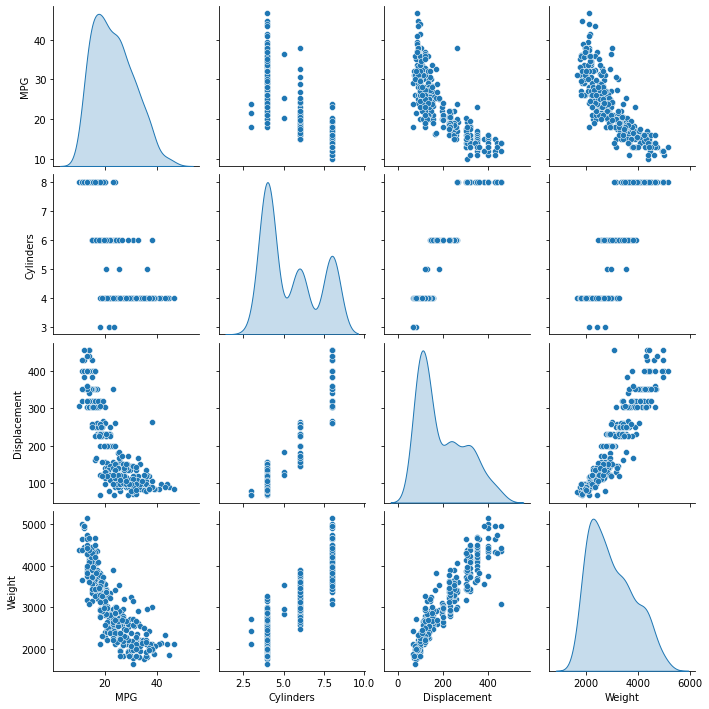

In [14]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind='kde')

Also look at the overall statistics

In [15]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


# ***Split features from label***
Separate target value, ot "label" from the features. This label is the value that you will train the model to predict.

In [16]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# **NORMALISE THE DATA**
Look again at the train_stats block above and note how different the ranges for each feature are.

It is good practice to normalise features that use different ranges and scales. Although the model might converge without feature normalisation, it makes training more difficult, and it makes resulting model more dependent on the choice of units used in the input.

Note:Although we intentionally generate these statistics from only the training datatset, these statistics will also be used to normalise test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [17]:
def norm(x):
    
    return (x - train_stats['mean'])/ train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

The normalised data will be used to train the model.

The statistics used to normalise these input here(mean and standard deviation) need to be applied to any other data that is fed to the model, along one-hot encoding that was done earlier. That include the test set as well as live data when the model is used in production 

# **The model**

# **Build the model**
Let's build the model. Here, sequential model will be used with two-densely connected hidden layers, and an output layer that returns a single, continuous layer. The model building steps are wrapped in a function, *build_model*, since a second model will be created later on.

In [23]:
def build_model():
  model = keras.Sequential([layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]), 
                            layers.Dense(64, activation=tf.nn.relu), 
                            layers.Dense(1)
                            ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mean_absolute_error'])

  return model

In [24]:
model = build_model()

# **Inspect the model**
 Use .summary method to print a simple description of the model

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training model and call model.predict on it.

In [26]:
## example_batch = normed_train_data[:10]
example_batch = norm(train_dataset)[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 52ms/step


array([[-0.38250023],
       [-0.3669023 ],
       [-0.05880547],
       [-0.5124035 ],
       [-0.6924372 ],
       [-0.10878512],
       [-0.68900526],
       [-0.50037324],
       [-0.10879175],
       [-0.15537031]], dtype=float32)

It seems to be working, it produces a result of the expected shape and type

# **Train the model**
Train the model for 1000 epochs, and record the training and validation acuracy in the history object

In [27]:
#Display training progress by printing a single dot for each completed epoch
#class PrintDot(keras.callbacks.Callback):
 # def on_epoch_end(self, epoch, logs):
  #  if epoch % 100 ==0: print('')
   # print('.', end='')   #callbacks= [PrintDot()]

EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose = 0 )

Visulaise the model's training progress using the stats stored in the history object

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
995,2.865829,1.122160,9.329901,2.386853,995
996,2.853993,1.089863,9.457250,2.366246,996
997,2.886454,1.121073,9.053720,2.392266,997
998,2.871250,1.069373,9.027600,2.371983,998
999,2.760473,1.047778,9.686894,2.404869,999


In [32]:
def build_model():
  model = keras.Sequential([layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]), 
                            layers.Dense(64, activation=tf.nn.relu), 
                            layers.Dense(1)
                            ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mean_absolute_error', tf.keras.metrics.MeanSquaredLogarithmicError()])

  return model

modelx = build_model()

modelx.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = modelx.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose = 0 )

In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_logarithmic_error,val_loss,val_mean_absolute_error,val_mean_squared_logarithmic_error,epoch
995,2.546999,1.039396,0.003113,9.408132,2.321142,0.015990,995
996,2.490025,1.044211,0.003057,8.802366,2.229656,0.015061,996
997,2.741392,1.076802,0.003278,8.747222,2.215068,0.015226,997
998,2.711069,1.048296,0.003292,9.323354,2.299439,0.017269,998
999,2.470933,1.000378,0.003007,8.489572,2.171779,0.014663,999


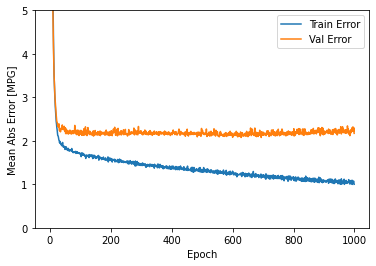

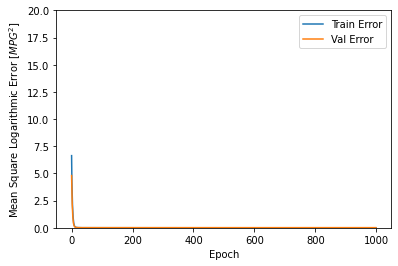

In [35]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label='Val Error')
  plt.legend()
  plt.ylim([0,5])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Logarithmic Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_logarithmic_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_logarithmic_error'],
           label='Val Error')
  plt.legend()
  plt.ylim([0,20])

plot_history(history)